In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preparing Dataframe old log layout

In [2]:
"""
dataframe=pd.read_csv('out/logs/log.csv', sep=";", names=["res","n_procs","runtime","error"])

#dataframe.set_index("res","n_procs")

speedupcol = dataframe.iloc[0]['runtime']/dataframe["runtime"]
dataframe["speedup"] = speedupcol

dataframe1 = dataframe[dataframe["res"] == 125]
dataframe2 = dataframe[dataframe["res"] == 500]
dataframe3 = dataframe[dataframe["res"] == 2000]
dataframe4 = dataframe[dataframe["res"] == 4000]

dataframe
"""

'\ndataframe=pd.read_csv(\'out/logs/log.csv\', sep=";", names=["res","n_procs","runtime","error"])\n\n#dataframe.set_index("res","n_procs")\n\nspeedupcol = dataframe.iloc[0][\'runtime\']/dataframe["runtime"]\ndataframe["speedup"] = speedupcol\n\ndataframe1 = dataframe[dataframe["res"] == 125]\ndataframe2 = dataframe[dataframe["res"] == 500]\ndataframe3 = dataframe[dataframe["res"] == 2000]\ndataframe4 = dataframe[dataframe["res"] == 4000]\n\ndataframe\n'

# Preparing Dataframe new log layout

In [3]:
#read df
dataframe=pd.read_csv('out/datacluster1/all_logs.txt', sep="\t", names=["all"])

#zerlegen des df
res = dataframe.iloc[0:len(dataframe):13].reset_index().drop(['index'], axis=1)
res = res["all"].str.split("=",expand=True).drop([0], axis=1).rename({1: 'res'}, axis=1)

dtype = dataframe.iloc[5:len(dataframe):13].reset_index().drop(['index'], axis=1)
dtype = dtype["all"].str.split("=",expand=True).drop([0], axis=1).rename({1: 'dtype'}, axis=1)

nproc = dataframe.iloc[6:len(dataframe):13].reset_index().drop(['index'], axis=1)
nproc = nproc["all"].str.split("=",expand=True).drop([0], axis=1).rename({1: 'nproc'}, axis=1).rename({'all': 'nproc'}, axis=1)

resi = dataframe.iloc[7:len(dataframe):13].reset_index().drop(['index'], axis=1)
resi = resi["all"].str.split("=",expand=True).drop([0], axis=1).rename({1: 'resi'}, axis=1).rename({'all': 'resi'}, axis=1)

resimax = dataframe.iloc[8:len(dataframe):13].reset_index().drop(['index'], axis=1)
resimax = resimax["all"].str.split("=",expand=True).drop([0], axis=1).rename({1: 'resimax'}, axis=1).rename({'all': 'resimax'}, axis=1)

err = dataframe.iloc[9:len(dataframe):13].reset_index().drop(['index'], axis=1)
err = err["all"].str.split("=",expand=True).drop([0], axis=1).rename({1: 'err'}, axis=1).rename({'all': 'err'}, axis=1)

errmax = dataframe.iloc[10:len(dataframe):13].reset_index().drop(['index'], axis=1)
errmax = errmax["all"].str.split("=",expand=True).drop([0], axis=1).rename({1: 'errmax'}, axis=1).rename({'all': 'errmax'}, axis=1)

runtime = dataframe.iloc[11:len(dataframe):13].reset_index().drop(['index'], axis=1)
runtime = runtime["all"].str.split("=",expand=True).drop([0], axis=1).rename({1: 'runtime'}, axis=1).rename({'all': 'runtime'}, axis=1)

ittime = dataframe.iloc[12:len(dataframe):13].reset_index().drop(['index'], axis=1)
ittime = ittime["all"].str.split("=",expand=True).drop([0], axis=1).rename({1: 'ittime'}, axis=1).rename({'all': 'ittime'}, axis=1)

#mergen des df
dataframe = res
dataframe['dtype'] = dtype['dtype']
dataframe['nproc'] = pd.to_numeric(nproc['nproc'])
dataframe['resi'] = pd.to_numeric(resi['resi'])
dataframe['resimax'] = pd.to_numeric(resimax['resimax'])
dataframe['err'] = pd.to_numeric(err['err'])
dataframe['errmax'] = pd.to_numeric(errmax['errmax'])
dataframe['runtime'] = pd.to_numeric(runtime['runtime'])
dataframe['ittime'] = pd.to_numeric(ittime['ittime'])
dataframe

,res,dtype,nproc,resi,resimax,err,errmax,runtime,ittime
0,125,DOUBLE,1,6.472551e+06,323010.4,8080.332,197.1747,0.001372,0.000019
1,125,DOUBLE,12,6.795145e+06,339314.7,8046.118,196.6266,0.005275,0.000394
2,125,DOUBLE,16,6.788378e+06,338974.5,8050.589,196.7720,0.005239,0.000380
3,125,DOUBLE,2,6.796297e+06,339327.6,8042.767,196.6213,0.001505,0.000015
4,125,DOUBLE,24,6.848918e+06,329938.2,8082.102,201.4325,0.007625,0.000419
...,...,...,...,...,...,...,...,...,...
95,500,FLOAT,80,2.104248e+08,5258543.0,36410.180,246.9940,0.031562,0.000856
96,125,DOUBLE,1,6.472551e+06,323010.4,8080.332,197.1747,0.001358,0.000024
97,2000,DOUBLE,1,6.680434e+09,83385080.0,149699.100,261.2151,0.327565,0.013335
98,4000,DOUBLE,1,3.781214e+10,333696600.0,300752.400,264.2680,1.301653,0.053552


# new df for each res and dtype

In [4]:
res1 = dataframe[dataframe["res"] == "125"]
res1f = res1[res1["dtype"] == " FLOAT"].sort_values(by=['nproc'])
res1d = res1[res1["dtype"] == " DOUBLE"].sort_values(by=['nproc'])

res2 = dataframe[dataframe["res"] == "500"]
res2f = res2[res2["dtype"] == " FLOAT"].sort_values(by=['nproc'])
res2d = res2[res2["dtype"] == " DOUBLE"].sort_values(by=['nproc'])

res3 = dataframe[dataframe["res"] == "2000"]
res3f = res3[res3["dtype"] == " FLOAT"].sort_values(by=['nproc'])
res3d = res3[res3["dtype"] == " DOUBLE"].sort_values(by=['nproc'])

res4 = dataframe[dataframe["res"] == "4000"]
res4f = res4[res4["dtype"] == " FLOAT"].sort_values(by=['nproc'])
res4d = res4[res4["dtype"] == " DOUBLE"].sort_values(by=['nproc'])

# computing Speedup of tot Runtime, avg. runtime/it and efficiency of both speedups

In [5]:
res1f["speedup"] = res1f.iloc[0]['runtime']/res1f["runtime"]
res1d["speedup"] = res1d.iloc[0]['runtime']/res1d["runtime"]
res2f["speedup"] = res2f.iloc[0]['runtime']/res2f["runtime"]
res2d["speedup"] = res2d.iloc[0]['runtime']/res2d["runtime"]
res3f["speedup"] = res3f.iloc[0]['runtime']/res3f["runtime"]
res3d["speedup"] = res3d.iloc[0]['runtime']/res3d["runtime"]
res4f["speedup"] = res4f.iloc[0]['runtime']/res4f["runtime"]
res4d["speedup"] = res4d.iloc[0]['runtime']/res4d["runtime"]

res1f["itspeedup"] = res1f.iloc[0]['ittime']/res1f["ittime"]
res1d["itspeedup"] = res1d.iloc[0]['ittime']/res1d["ittime"]
res2f["itspeedup"] = res2f.iloc[0]['ittime']/res2f["ittime"]
res2d["itspeedup"] = res2d.iloc[0]['ittime']/res2d["ittime"]
res3f["itspeedup"] = res3f.iloc[0]['ittime']/res3f["ittime"]
res3d["itspeedup"] = res3d.iloc[0]['ittime']/res3d["ittime"]
res4f["itspeedup"] = res4f.iloc[0]['ittime']/res4f["ittime"]
res4d["itspeedup"] = res4d.iloc[0]['ittime']/res4d["ittime"]

res1f["effi"] = res1f['speedup']/res1f["nproc"]
res1d["effi"] = res1d['speedup']/res1d["nproc"]
res2f["effi"] = res2f['speedup']/res2f["nproc"]
res2d["effi"] = res2d['speedup']/res2d["nproc"]
res3f["effi"] = res3f['speedup']/res3f["nproc"]
res3d["effi"] = res3d['speedup']/res3d["nproc"]
res4f["effi"] = res4f['speedup']/res4f["nproc"]
res4d["effi"] = res4d['speedup']/res4d["nproc"]

res1f["iteffi"] = res1f['itspeedup']/res1f["nproc"]
res1d["iteffi"] = res1d['itspeedup']/res1d["nproc"]
res2f["iteffi"] = res2f['itspeedup']/res2f["nproc"]
res2d["iteffi"] = res2d['itspeedup']/res2d["nproc"]
res3f["iteffi"] = res3f['itspeedup']/res3f["nproc"]
res3d["iteffi"] = res3d['itspeedup']/res3d["nproc"]
res4f["iteffi"] = res4f['itspeedup']/res4f["nproc"]
res4d["iteffi"] = res4d['itspeedup']/res4d["nproc"]

res4d

,res,dtype,nproc,resi,resimax,err,errmax,runtime,ittime,speedup,itspeedup,effi,iteffi
24,4000,DOUBLE,1,3.781214e+10,333696600.0,300752.4,264.2680,1.600517,0.054310,1.000000,1.000000,1.000000,1.000000
98,4000,DOUBLE,1,3.781214e+10,333696600.0,300752.4,264.2680,1.301653,0.053552,1.229603,1.014171,1.229603,1.014171
27,4000,DOUBLE,2,3.787160e+10,334221300.0,300751.2,264.2678,1.303602,0.028831,1.227765,1.883723,0.613883,0.941861
30,4000,DOUBLE,4,3.787160e+10,334221300.0,300751.2,264.2678,1.103282,0.013265,1.450687,4.094150,0.362672,1.023538
34,4000,DOUBLE,8,3.787160e+10,334221300.0,300751.3,264.2678,1.061805,0.008004,1.507355,6.785272,0.188419,0.848159
25,4000,DOUBLE,12,3.787160e+10,334221300.0,300751.3,264.2678,1.069287,0.006521,1.496808,8.328408,0.124734,0.694034
26,4000,DOUBLE,16,3.787160e+10,334221300.0,300751.3,264.2678,1.045276,0.005626,1.531191,9.653720,0.095699,0.603358
28,4000,DOUBLE,24,3.787160e+10,334221300.0,300751.3,264.2678,1.083605,0.006985,1.477030,7.774973,0.061543,0.323957
29,4000,DOUBLE,32,3.787160e+10,334221300.0,300751.3,264.2678,1.092106,0.006268,1.465533,8.665175,0.045798,0.270787
31,4000,DOUBLE,48,3.787160e+10,334221300.0,300751.3,264.2678,1.167359,0.005021,1.371058,10.815954,0.028564,0.225332


# Plotting total Runtime and avg. runtime/it

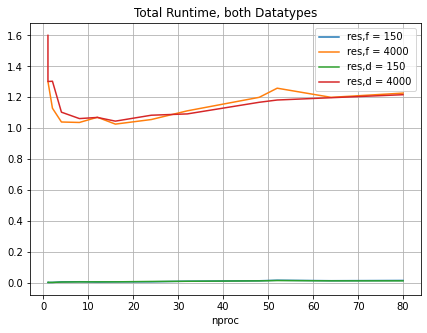

In [24]:
plt.figure(num = 3, figsize=(7, 5))
plt.plot(res1f["nproc"],res1f["runtime"],label="res,f = 150")
# plt.plot(res2f["nproc"],res2f["runtime"],label="res,f = 500")
# plt.plot(res3f["nproc"],res3f["runtime"],label="res,f = 2000")
plt.plot(res4f["nproc"],res4f["runtime"],label="res,f = 4000")
plt.plot(res1d["nproc"],res1d["runtime"],label="res,d = 150")
# plt.plot(res2d["nproc"],res2d["runtime"],label="res,d = 500")
# plt.plot(res3d["nproc"],res3d["runtime"],label="res,d = 2000")
plt.plot(res4d["nproc"],res4d["runtime"],label="res,d = 4000")
plt.legend()
plt.xlabel("nproc")
# plt.yscale("log")
plt.title("Total Runtime, both Datatypes")
plt.grid()
# plt.show()
plt.savefig('out/plots/runtimes.pdf')

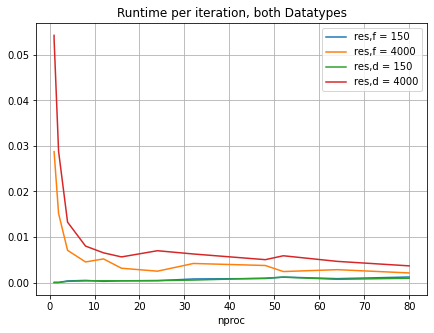

In [25]:
plt.figure(num = 3, figsize=(7, 5))
plt.plot(res1f["nproc"],res1f["ittime"],label="res,f = 150")
# plt.plot(res2f["nproc"],res2f["ittime"],label="res,f = 500")
# plt.plot(res3f["nproc"],res3f["ittime"],label="res,f = 2000")
plt.plot(res4f["nproc"],res4f["ittime"],label="res,f = 4000")
plt.plot(res1d["nproc"],res1d["ittime"],label="res,d = 150")
# plt.plot(res2d["nproc"],res2d["ittime"],label="res,d = 500")
# plt.plot(res3d["nproc"],res3d["ittime"],label="res,d = 2000")
plt.plot(res4d["nproc"],res4d["ittime"],label="res,d = 4000")
plt.legend()
plt.xlabel("nproc")
# plt.yscale("log")
plt.title("Runtime per iteration, both Datatypes")
plt.grid()
# plt.show()
plt.savefig('out/plots/ittimes.pdf')

# Plotting Speedup of tot Runtime and avg. runtime/it

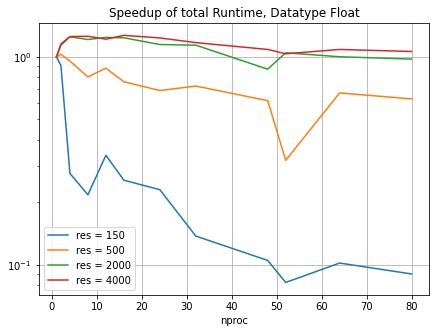

In [23]:
plt.figure(num = 3, figsize=(7, 5))
plt.plot(res1f["nproc"],res1f["speedup"],label="res = 150")
plt.plot(res2f["nproc"],res2f["speedup"],label="res = 500")
plt.plot(res3f["nproc"],res3f["speedup"],label="res = 2000")
plt.plot(res4f["nproc"],res4f["speedup"],label="res = 4000")
plt.legend()
plt.xlabel("nproc")
plt.yscale("log")
plt.title("Speedup of total Runtime, Datatype Float")
plt.grid()
# plt.show()
plt.savefig('out/plots/speedup_f.pdf')

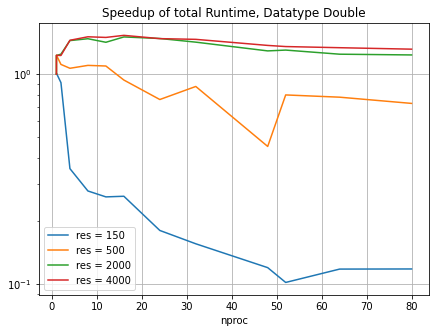

In [70]:
plt.figure(num = 3, figsize=(7, 5))
plt.plot(res1d["nproc"],res1d["speedup"],label="res = 150")
plt.plot(res2d["nproc"],res2d["speedup"],label="res = 500")
plt.plot(res3d["nproc"],res3d["speedup"],label="res = 2000")
plt.plot(res4d["nproc"],res4d["speedup"],label="res = 4000")
plt.legend()
plt.xlabel("nproc")
plt.yscale("log")
plt.title("Speedup of total Runtime, Datatype Double")
plt.grid()

plt.savefig('out/plots/speedup_d.pdf')
plt.show()

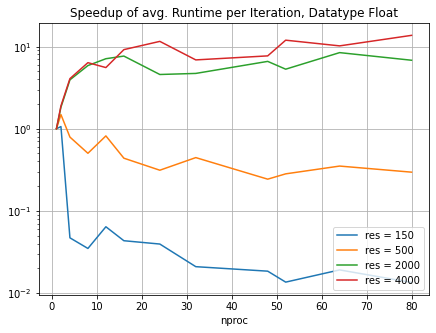

In [71]:
plt.figure(num = 3, figsize=(7, 5))
plt.plot(res1f["nproc"],res1f["itspeedup"],label="res = 150")
plt.plot(res2f["nproc"],res2f["itspeedup"],label="res = 500")
plt.plot(res3f["nproc"],res3f["itspeedup"],label="res = 2000")
plt.plot(res4f["nproc"],res4f["itspeedup"],label="res = 4000")
plt.legend()
plt.xlabel("nproc")
plt.yscale("log")
plt.title("Speedup of avg. Runtime per Iteration, Datatype Float")
plt.grid()

plt.savefig('out/plots/itspeedup_f.pdf')

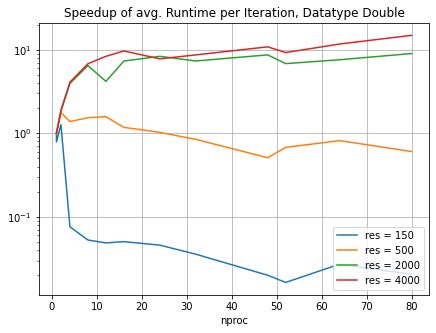

In [72]:
plt.figure(num = 3, figsize=(7, 5))
plt.plot(res1d["nproc"],res1d["itspeedup"],label="res = 150")
plt.plot(res2d["nproc"],res2d["itspeedup"],label="res = 500")
plt.plot(res3d["nproc"],res3d["itspeedup"],label="res = 2000")
plt.plot(res4d["nproc"],res4d["itspeedup"],label="res = 4000")
plt.legend()
plt.xlabel("nproc")
plt.yscale("log")
plt.title("Speedup of avg. Runtime per Iteration, Datatype Double")
plt.grid()

plt.savefig('out/plots/itspeedup_d.pdf')

# plotting efficiency

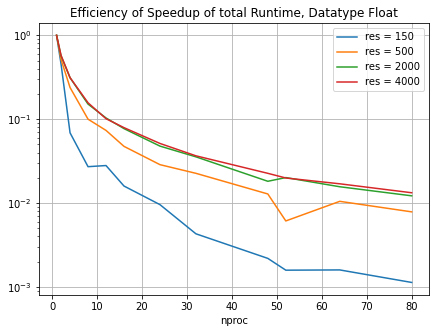

In [73]:
plt.figure(num = 3, figsize=(7, 5))
plt.plot(res1f["nproc"],res1f["effi"],label="res = 150")
plt.plot(res2f["nproc"],res2f["effi"],label="res = 500")
plt.plot(res3f["nproc"],res3f["effi"],label="res = 2000")
plt.plot(res4f["nproc"],res4f["effi"],label="res = 4000")
plt.legend()
plt.xlabel("nproc")
plt.yscale("log")
plt.title("Efficiency of Speedup of total Runtime, Datatype Float")
plt.grid()

plt.savefig('out/plots/effi_f.pdf')

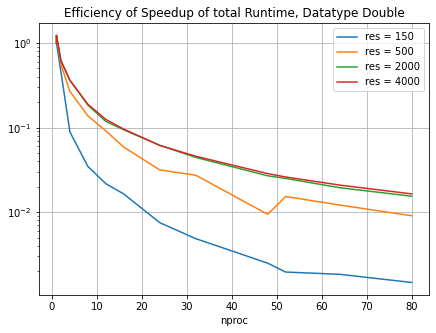

In [74]:
plt.figure(num = 3, figsize=(7, 5))
plt.plot(res1d["nproc"],res1d["effi"],label="res = 150")
plt.plot(res2d["nproc"],res2d["effi"],label="res = 500")
plt.plot(res3d["nproc"],res3d["effi"],label="res = 2000")
plt.plot(res4d["nproc"],res4d["effi"],label="res = 4000")
plt.legend()
plt.xlabel("nproc")
plt.yscale("log")
plt.title("Efficiency of Speedup of total Runtime, Datatype Double")
plt.grid()

plt.savefig('out/plots/effi_d.pdf')

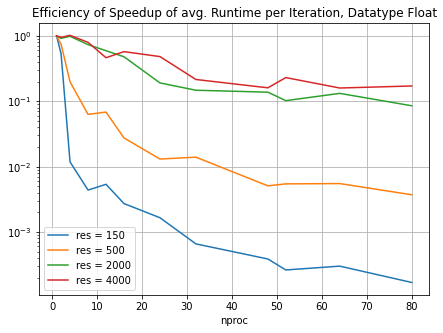

In [75]:
plt.figure(num = 3, figsize=(7, 5))
plt.plot(res1f["nproc"],res1f["iteffi"],label="res = 150")
plt.plot(res2f["nproc"],res2f["iteffi"],label="res = 500")
plt.plot(res3f["nproc"],res3f["iteffi"],label="res = 2000")
plt.plot(res4f["nproc"],res4f["iteffi"],label="res = 4000")
plt.legend()
plt.xlabel("nproc")
plt.yscale("log")
plt.title("Efficiency of Speedup of avg. Runtime per Iteration, Datatype Float")
plt.grid()

plt.savefig('out/plots/iteffi_f.pdf')

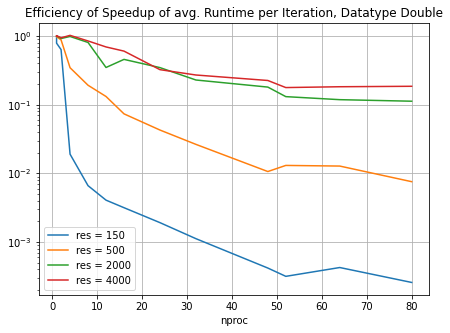

In [76]:
plt.figure(num = 3, figsize=(7, 5))
plt.plot(res1d["nproc"],res1d["iteffi"],label="res = 150")
plt.plot(res2d["nproc"],res2d["iteffi"],label="res = 500")
plt.plot(res3d["nproc"],res3d["iteffi"],label="res = 2000")
plt.plot(res4d["nproc"],res4d["iteffi"],label="res = 4000")
plt.legend()
plt.xlabel("nproc")
plt.yscale("log")
plt.title("Efficiency of Speedup of avg. Runtime per Iteration, Datatype Double")
plt.grid()

plt.savefig('out/plots/iteffi_d.pdf')

# Plotting Error

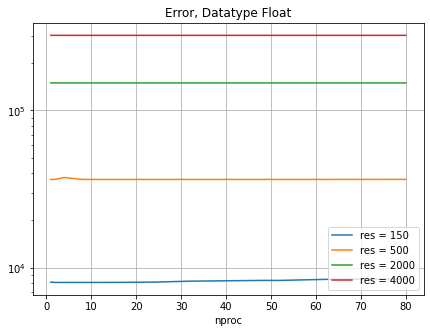

In [77]:
plt.figure(num = 3, figsize=(7, 5))
plt.plot(res1f["nproc"],res1f["err"],label="res = 150")
plt.plot(res2f["nproc"],res2f["err"],label="res = 500")
plt.plot(res3f["nproc"],res3f["err"],label="res = 2000")
plt.plot(res4f["nproc"],res4f["err"],label="res = 4000")
plt.legend()
plt.xlabel("nproc")
plt.yscale("log")
plt.title("Error, Datatype Float")
plt.grid()

plt.savefig('out/plots/err_f.pdf')

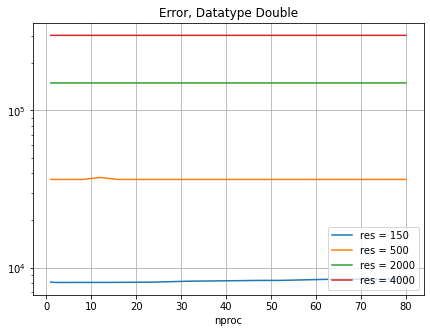

In [78]:
plt.figure(num = 3, figsize=(7, 5))
plt.plot(res1d["nproc"],res1d["err"],label="res = 150")
plt.plot(res2d["nproc"],res2d["err"],label="res = 500")
plt.plot(res3d["nproc"],res3d["err"],label="res = 2000")
plt.plot(res4d["nproc"],res4d["err"],label="res = 4000")
plt.legend()
plt.xlabel("nproc")
plt.yscale("log")
plt.title("Error, Datatype Double")
plt.grid()

plt.savefig('out/plots/err_d.pdf')